In [105]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster
from folium.plugins import TimeSliderChoropleth
import json
import webbrowser
import os

## Loading School Data 

In [3]:

df=pd.read_csv("C:/Users/tanma/Downloads/master_dataset1.csv")

In [4]:
# Check for duplicates  

data = df.drop_duplicates()

## no duplicates found

# Null Values 

In [6]:
nu=data.isna().sum()

In [7]:
data.isna().sum().sum() ## Total Value of missing

2879

## Droping Columns Missing Values 
Dropped-
Suport clasess - No value found

Not relevant-
Operational Directorate phone and fax was not relevant 

All the null values is removed and ready for analysis


In [9]:
ms=data.drop(columns=["Support_classes"])
fd1=ms.dropna()
fd1.head(5)


School_code    AgeID                                      School_name  \
2         8473  46360.0                    Chifley College Senior Campus   
4         8870  46426.0                      St Marys Senior High School   
5         8374  46489.0  Brisbane Water Secondary College Woy Woy Campus   
6         8539   6496.0  Sydney Secondary College Blackwattle Bay Campus   
7         5104  47590.0                  Australia Street Infants School   

             Street   Town_suburb  Postcode      Phone  \
2   67 North Parade  MOUNT DRUITT      2770  9625 9920   
4        Kalang Ave      St Marys      2760  9623 8333   
5  25 EDWARD STREET       WOY WOY      2256  4341 1600   
6         Taylor St        Glebe       2037  9660 5688   
7      Australia St      Newtown       2042  9557 5377   

                         School_Email  \
2  chifcolsnr-h.school@det.nsw.edu.au   
4  stmaryssen-h.school@det.nsw.edu.au   
5      woywoy-h.school@det.nsw.edu.au   
6  sscbwattle-h.school@det.nsw.edu.au   
7  australist-p.school@det.nsw.edu.au   

                                   Website        Fax  ...  \
2  https://chifcolsnr-h.schools.nsw.gov.au  9832 2413  ...   
4  https://stmaryssen-h.schools.nsw.gov.au  9833 1304  ...   
5      https://woywoy-h.schools.nsw.gov.au  4344 3263  ...   
6  https://sscbwattle-h.schools.nsw.gov.au  9552 1796  ...   
7  https://australist-p.schools.nsw.gov.au  9550 1461  ...   

                                    FACS_district  Local_health_district  \
2          Western Sydney & Nepean Blue Mountains         Western Sydney   
4          Western Sydney & Nepean Blue Mountains  Nepean Blue Mountains   
5              Hunter New England & Central Coast          Central Coast   
6  South Eastern Sydney, Northern Sydney & Sydney                 Sydney   
7  South Eastern Sydney, Northern Sydney & Sydney                 Sydney   

         AECG_region            ASGS_remoteness   Latitude   Longitude  \
2  Metropolitan West  Major Cities of Australia -33.769305  150.829855   
4  Metropolitan West  Major Cities of Australia -33.763119  150.770024   
5      Central Coast  Major Cities of Australia -33.492687  151.323582   
6  Metropolitan East  Major Cities of Australia -33.875142  151.188357   
7  Metropolitan East  Major Cities of Australia -33.895783  151.177607   

            Assets unit                                     SA4 FOEI_Value  \
2        Western Sydney                      Sydney - Blacktown      167.0   
4        Western Sydney  Sydney - Outer West and Blue Mountains       55.0   
5  Hunter/Central Coast                           Central Coast      118.0   
6                Sydney           Sydney - City and Inner South       24.0   
7                Sydney           Sydney - City and Inner South        0.0   

  Date_extracted  
2     2024-08-09  
4     2024-08-09  
5     2024-08-09  
6     2024-08-09  
7     2024-08-09  

[5 rows x 44 columns]

## Checking any NaN Values and np value

In [11]:
fd1.isna().sum().sum()

0

In [12]:

min=fd1["Indigenous_pct"].min()
min1=fd1["LBOTE_pct"].min()
min2=fd1["ICSEA_value"].min()


In [13]:
fd=fd1.replace(to_replace="np", value="0.0" )


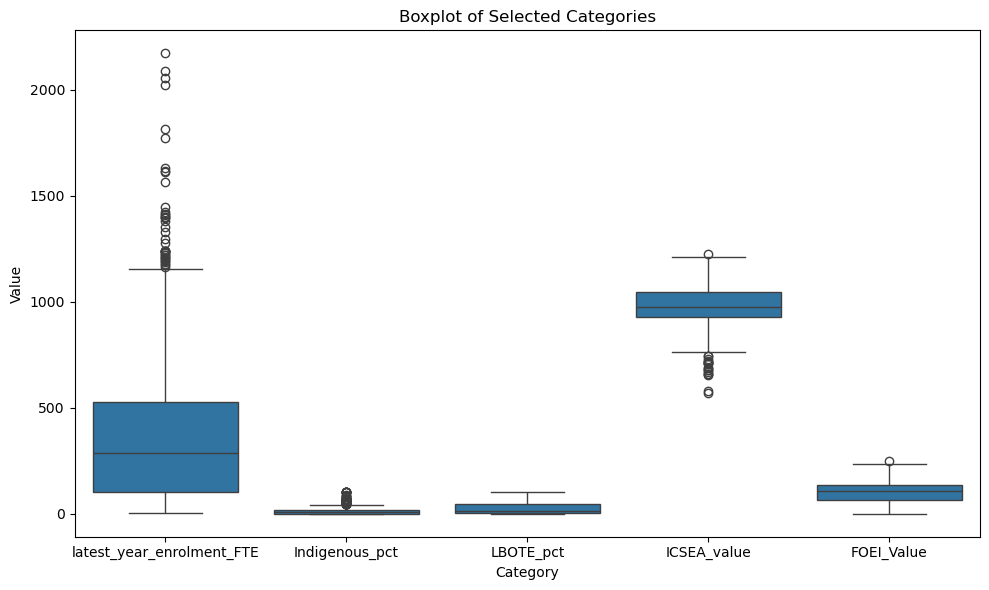

In [14]:
# Assuming fd is your DataFrame
new = fd[["latest_year_enrolment_FTE", "Indigenous_pct", "LBOTE_pct", "ICSEA_value","FOEI_Value"]]

# Melt the DataFrame to long format
melted = new.melt(var_name='Category', value_name='Value')

# Set the figure size for the overall plot
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='Category', y='Value', data=melted)
plt.gca().invert_yaxis()
# Show the plot
plt.title('Boxplot of Selected Categories')
plt.tight_layout()  # Adjusts the layout to fit into the figure area.
plt.show()


In [15]:
# converting  Column LBOTE_pct from Object to Float 64 data type 

fd['LBOTE_pct'] = pd.to_numeric(fd['LBOTE_pct'])

fd[["ICSEA_value","LBOTE_pct", "FOEI_Value"]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1929 entries, 2 to 2173
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ICSEA_value  1929 non-null   float64
 1   LBOTE_pct    1929 non-null   float64
 2   FOEI_Value   1929 non-null   float64
dtypes: float64(3)
memory usage: 60.3 KB


ICSEA_value    0
LBOTE_pct      0
FOEI_Value     0
dtype: int64


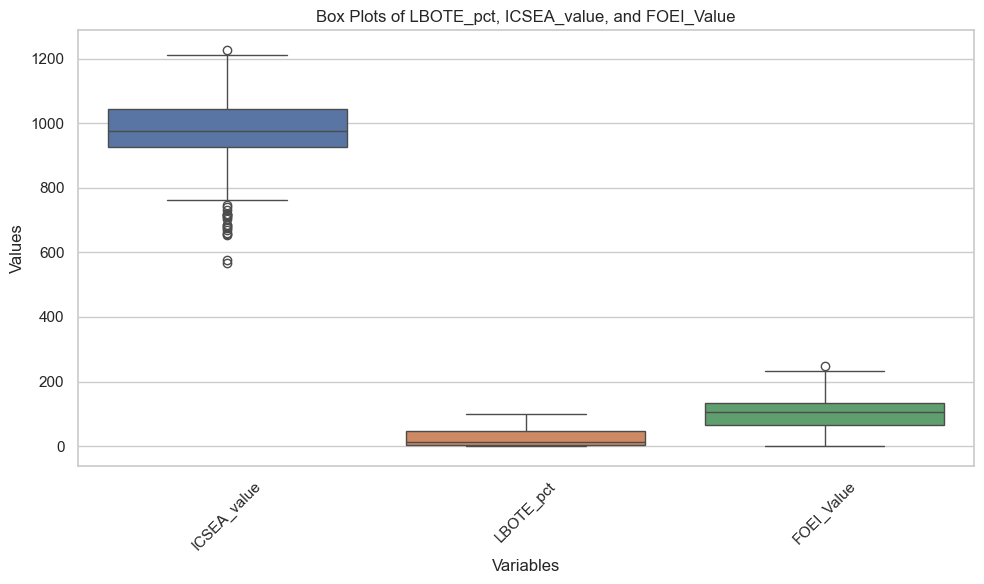

In [16]:
#Filter the DataFrame
new = fd[[ "ICSEA_value","LBOTE_pct", "FOEI_Value"]]

# Check for NaN values
print(new.isnull().sum())

melted = new.melt(var_name='Category', value_name='Value')

# If there are NaN values, you can fill or drop them
new = new.dropna()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=new)
plt.title('Box Plots of LBOTE_pct, ICSEA_value, and FOEI_Value')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Fixing Outliers
## ICSEA _value, FOEL Value

In [18]:
# Oulier for FOEI Value 
new = fd[[ "ICSEA_value", "FOEI_Value"]]
Q1=np.percentile(fd["FOEI_Value"],25,interpolation='midpoint')
Q2=np.percentile(fd["FOEI_Value"],50,interpolation='midpoint')
Q3=np.percentile(fd["FOEI_Value"],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
outlier=[]

for x in data["FOEI_Value"]:
    if((x>upper_limit)or(x<lower_limit)):
        outlier.append(x)

outlier


[249.0, 248.0]

In [19]:
outlier_index=fd['FOEI_Value']>upper_limit
fd.loc[outlier_index].index

Index([1546], dtype='int64')

In [20]:
fd.drop([1546],inplace=True)

## ICSEA Value Outliers 


In [22]:
## Outlier for ICSEA_value

new = fd[[ "ICSEA_value", "FOEI_Value"]]
Q1=np.percentile(fd["ICSEA_value"],25,interpolation='midpoint')
Q2=np.percentile(fd["ICSEA_value"],50,interpolation='midpoint')
Q3=np.percentile(fd["ICSEA_value"],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
outlier1=[]

for x in data["ICSEA_value"]:
    if((x>upper_limit)):
        outlier1.append(x)
outlier1

[1226.0]

In [23]:
outlier_index1=fd['ICSEA_value']>upper_limit
fd.loc[outlier_index1].index

Index([909], dtype='int64')

In [24]:
fd.drop([909],inplace=True)

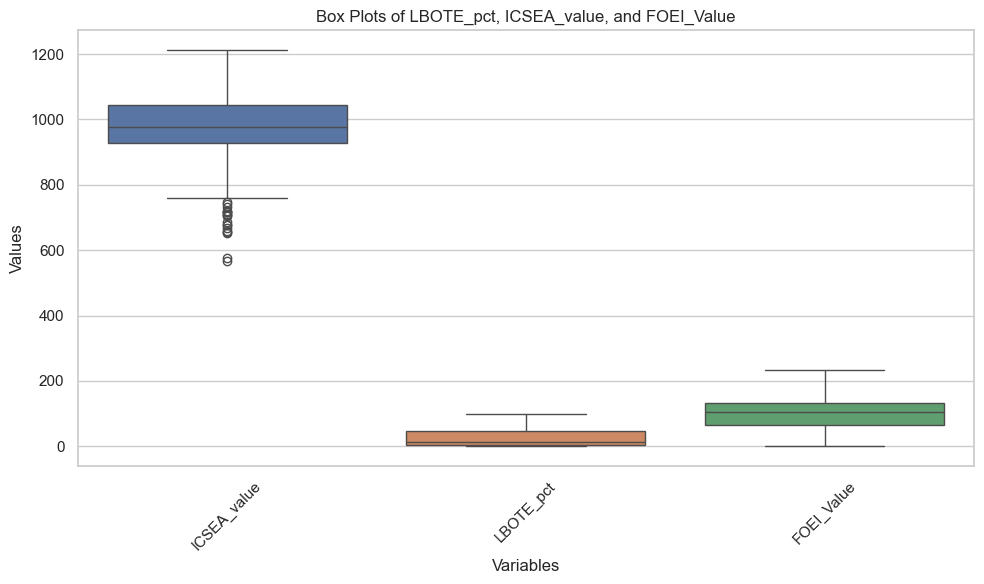

C:\mnt\data\fd.csv

In [25]:
# final Check for outliers
#Filter the DataFrame
new = fd[[ "ICSEA_value","LBOTE_pct", "FOEI_Value"]]

# If there are NaN values, you can fill or drop them
new = new.dropna()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=new)
plt.title('Box Plots of LBOTE_pct, ICSEA_value, and FOEI_Value')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
from IPython.display import FileLink

filtered_dataset_path = '/mnt/data/fd.csv'
FileLink(filtered_dataset_path)

# Loading Head count data 

In [27]:

## new  data set
hd=pd.read_csv("C:/Users/tanma/Downloads/headcount.csv")


In [28]:
## Dropping Duplicates and Null Values 
data1 = hd.drop_duplicates()
nu1=data1.isna().sum()


In [29]:
data1.isna().sum().sum() ## Total Value of missing

1828

In [30]:
# Fixing null values 
fd9=data1.dropna()

In [31]:
fd9.isna().sum().sum()

0

## Replacing Sp values becaues it represents student' less than 5 which is insignificant 

In [33]:
# used minmum value to replace SP values which is 6 for Head count Columns 
random_value = 6

# Count occurrences of "SP"
sp_count = (fd9 == "SP").sum().sum()
sp_count
# Replace "SP" with 6
fd10=fd9.replace("SP", random_value)
hc=fd10
#check
sp = fd10[fd10['School Name'] == 'Yarrowitch Public School']

In [34]:
# Chaging data type for all head count from object to int 64
fd10['HC_2005'] = pd.to_numeric(fd10['HC_2005'])
fd10['HC_2006'] = pd.to_numeric(fd10['HC_2006'])
fd10['HC_2007'] = pd.to_numeric(fd10['HC_2007'])
fd10['HC_2008'] = pd.to_numeric(fd10['HC_2008'])
fd10['HC_2009'] = pd.to_numeric(fd10['HC_2009'])
fd10['HC_2010'] = pd.to_numeric(fd10['HC_2010'])
fd10['HC_2011'] = pd.to_numeric(fd10['HC_2011'])
fd10['HC_2012'] = pd.to_numeric(fd10['HC_2012'])
fd10['HC_2013'] = pd.to_numeric(fd10['HC_2013'])
fd10['HC_2014'] = pd.to_numeric(fd10['HC_2014'])
fd10['HC_2015'] = pd.to_numeric(fd10['HC_2015'])
fd10['HC_2016'] = pd.to_numeric(fd10['HC_2016'])
fd10['HC_2017'] = pd.to_numeric(fd10['HC_2017'])
fd10['HC_2018'] = pd.to_numeric(fd10['HC_2018'])
fd10['HC_2019'] = pd.to_numeric(fd10['HC_2019'])
fd10['HC_2020'] = pd.to_numeric(fd10['HC_2020'])
fd10['HC_2021'] = pd.to_numeric(fd10['HC_2021'])
fd10['HC_2022'] = pd.to_numeric(fd10['HC_2022'])
fd10['HC_2023'] = pd.to_numeric(fd10['HC_2023'])


<Axes: title={'center': 'Box Plots of Head count'}, xlabel='Years', ylabel='Head counts '>

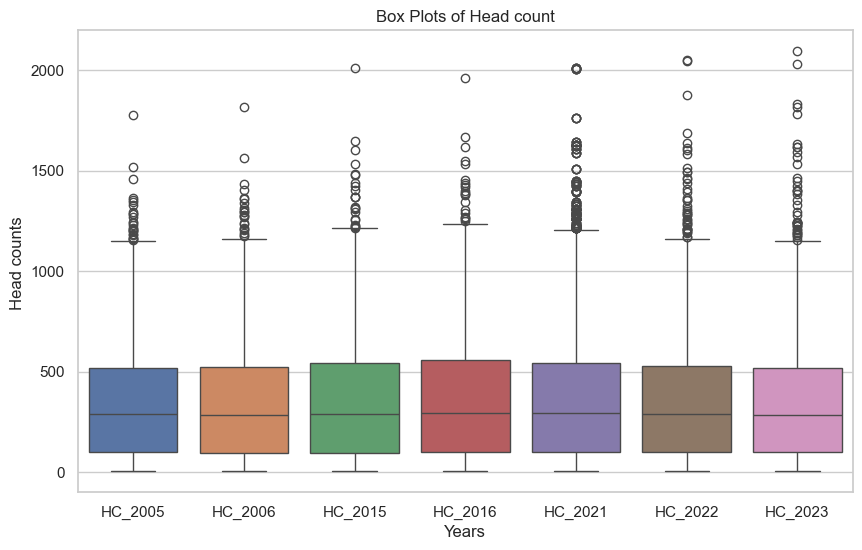

In [35]:
## Outlier check for Head count
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.title('Box Plots of Head count')
plt.ylabel('Head counts ')
plt.xlabel("Years")
sns.boxplot(data=hc[["HC_2004",'HC_2005',"HC_2006","HC_2015","HC_2016","HC_2021","HC_2021","HC_2022","HC_2023"]])


## Population data set

In [38]:
pop=pd.read_csv("C:/Users/tanma/OneDrive/Desktop/PopulationSexAge copy.csv")


## Edits on the csv file as Age and sex rows have been combined into a single cell for easy analysis

## row SA4(EN) dropped due to whole row being Blank 

# Acccesing Data set name 
## fd for school data 
## hc for Head count data
## pop for Population data set 

# KBQ 1 
## How can schools with smaller enrolments be characterized?
    Soritng schools in metropolitan of Sydney 


In [41]:
# Joining head counts 


In [42]:
# sorting schools  for Metropolitian of sydney
totalenrol24=fd[["latest_year_enrolment_FTE","SA4"]]
totalenrol24.describe()


latest_year_enrolment_FTE
count                1927.000000
mean                  360.769538
std                   319.921062
min                     4.000000
25%                   100.000000
50%                   288.000000
75%                   525.000000
max                  2173.000000

In [43]:
enrol24=fd[["latest_year_enrolment_FTE","SA4","School_name","School_code","Level_of_schooling"]]
enrol24

latest_year_enrolment_FTE                                     SA4  \
2                         471.0                      Sydney - Blacktown   
4                         874.4  Sydney - Outer West and Blue Mountains   
5                         663.4                           Central Coast   
6                         777.2           Sydney - City and Inner South   
7                          92.0           Sydney - City and Inner South   
...                         ...                                     ...   
2168                      870.7       Sydney - North Sydney and Hornsby   
2170                      290.0                     Sydney - Inner West   
2171                      390.0                         Mid North Coast   
2172                     2173.0                      Sydney - Blacktown   
2173                     2056.8                      Sydney - Blacktown   

                                          School_name  School_code  \
2                       Chifley College Senior Campus         8473   
4                         St Marys Senior High School         8870   
5     Brisbane Water Secondary College Woy Woy Campus         8374   
6     Sydney Secondary College Blackwattle Bay Campus         8539   
7                     Australia Street Infants School         5104   
...                                               ...          ...   
2168                          Cammeraygal High School         8910   
2170                    Victoria Avenue Public School         4655   
2171                        Lake Cathie Public School         4654   
2172                          Riverbank Public School         4653   
2173                            The Ponds High School         8911   

     Level_of_schooling  
2      Secondary School  
4      Secondary School  
5      Secondary School  
6      Secondary School  
7        Infants School  
...                 ...  
2168   Secondary School  
2170     Primary School  
2171     Primary School  
2172     Primary School  
2173   Secondary School  

[1927 rows x 5 columns]

In [44]:
## 2024 schools in Metropolitian Sydney Area 
sydney_schools = enrol24[enrol24['SA4'].str.startswith('Sydney')]
sydney_schools

latest_year_enrolment_FTE                                     SA4  \
2                         471.0                      Sydney - Blacktown   
4                         874.4  Sydney - Outer West and Blue Mountains   
6                         777.2           Sydney - City and Inner South   
7                          92.0           Sydney - City and Inner South   
8                         394.0                     Sydney - Inner West   
...                         ...                                     ...   
2167                      394.0                     Sydney - Inner West   
2168                      870.7       Sydney - North Sydney and Hornsby   
2170                      290.0                     Sydney - Inner West   
2172                     2173.0                      Sydney - Blacktown   
2173                     2056.8                      Sydney - Blacktown   

                                          School_name  School_code  \
2                       Chifley College Senior Campus         8473   
4                         St Marys Senior High School         8870   
6     Sydney Secondary College Blackwattle Bay Campus         8539   
7                     Australia Street Infants School         5104   
8                           Russell Lea Public School         5132   
...                                               ...          ...   
2167                       Marie Bashir Public School         4652   
2168                          Cammeraygal High School         8910   
2170                    Victoria Avenue Public School         4655   
2172                          Riverbank Public School         4653   
2173                            The Ponds High School         8911   

     Level_of_schooling  
2      Secondary School  
4      Secondary School  
6      Secondary School  
7        Infants School  
8        Primary School  
...                 ...  
2167     Primary School  
2168   Secondary School  
2170     Primary School  
2172     Primary School  
2173   Secondary School  

[854 rows x 5 columns]

In [45]:
## joining data between head count data and Master data with school code and Making a new data 

merged_data = pd.merge(hc[["School Code", "HC_2020", "HC_2021", "HC_2022", "HC_2023"]],
                        sydney_schools,
                        left_on='School Code',
                        right_on='School_code',
                        how='inner')

jd=merged_data[["HC_2020", "HC_2021", "HC_2022", "HC_2023","SA4","School_name","Level_of_schooling"]]


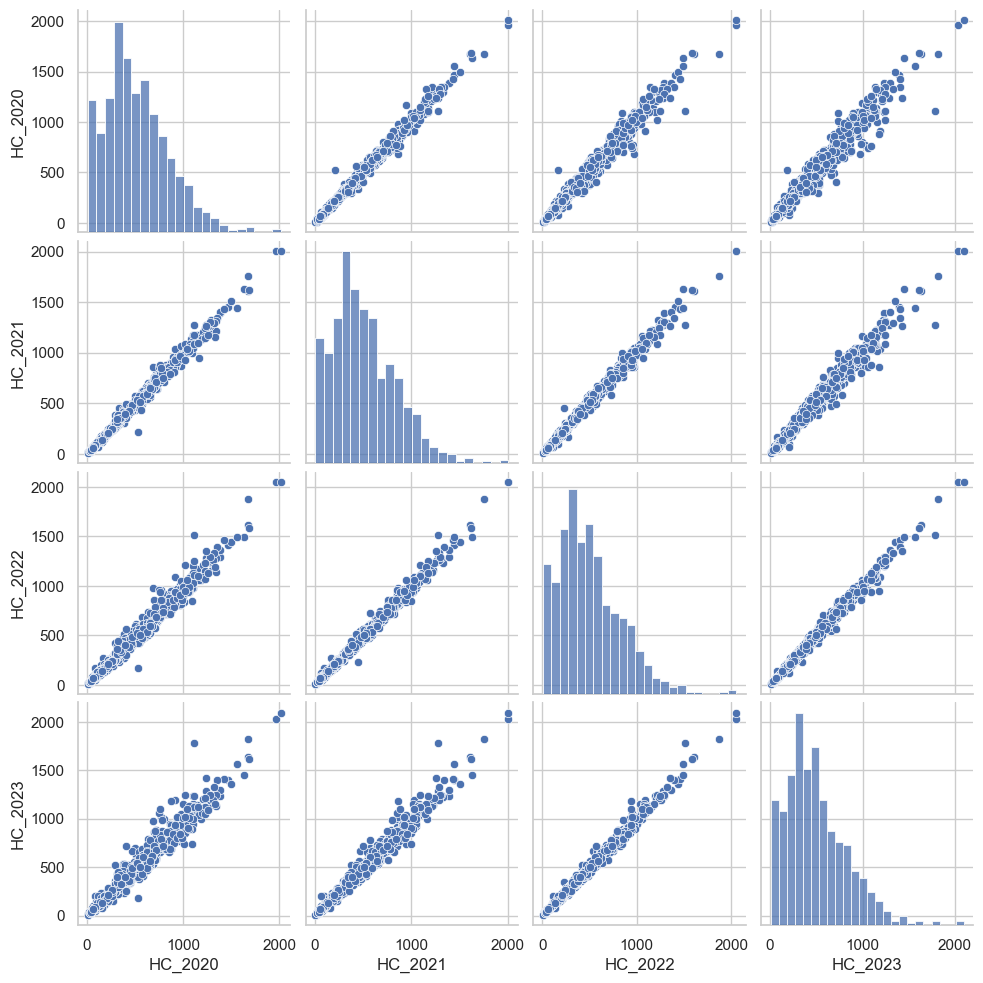

In [46]:
sns.pairplot(jd)

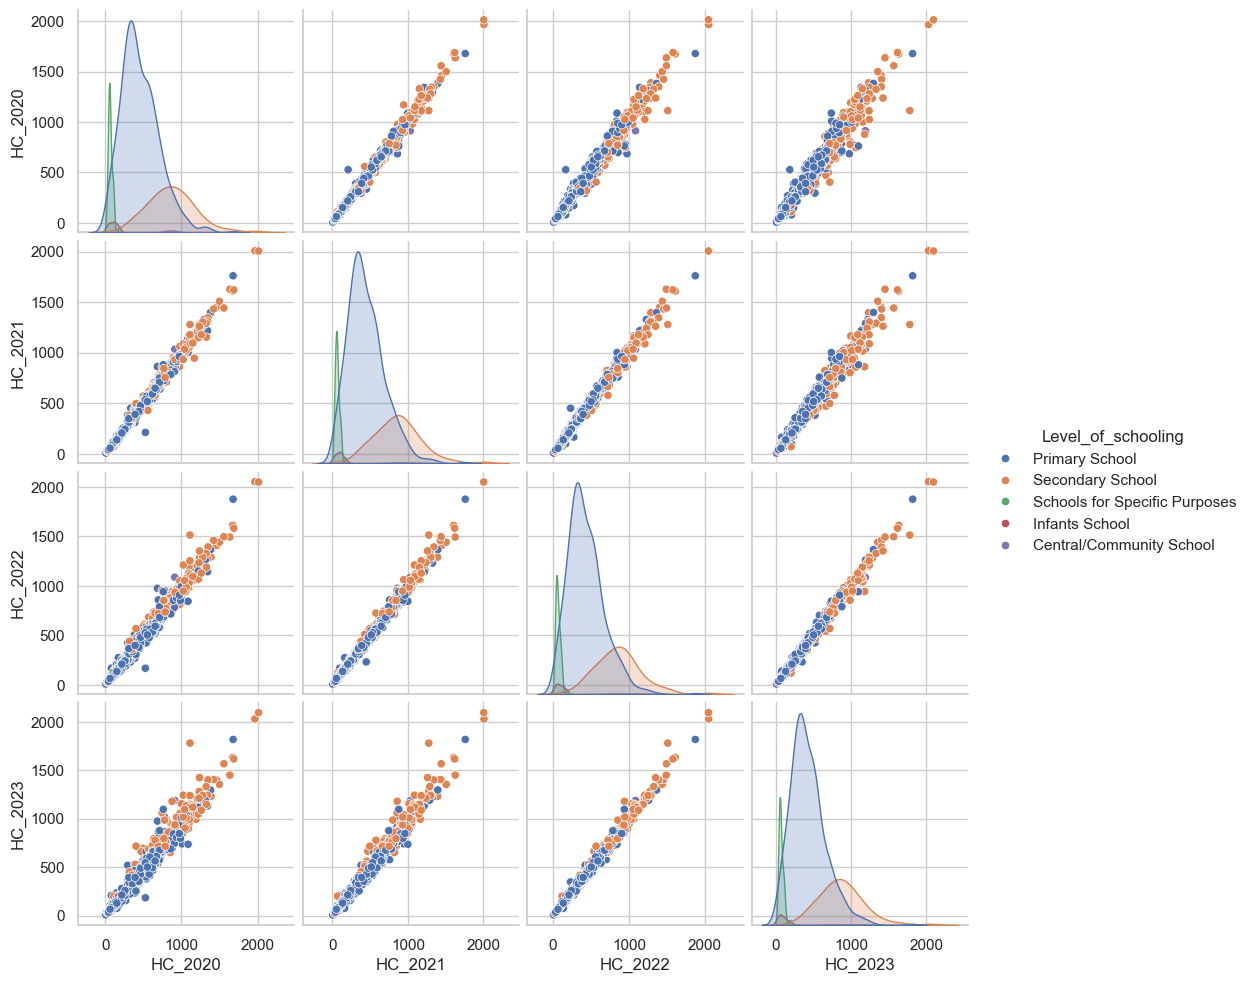

In [47]:
# EDA 
sns.pairplot(jd,hue = 'Level_of_schooling')

Some insights form the EDA

In terms of enrolement or head Count
1. Primary school and Secondary school does have a higher enrolement overall
2. Infants and Community schools are small in number




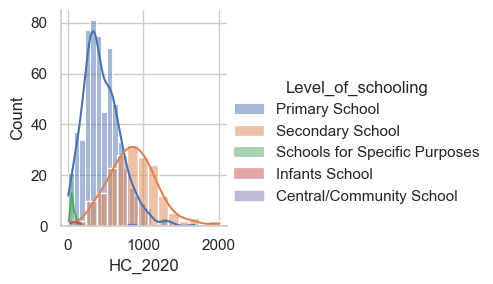

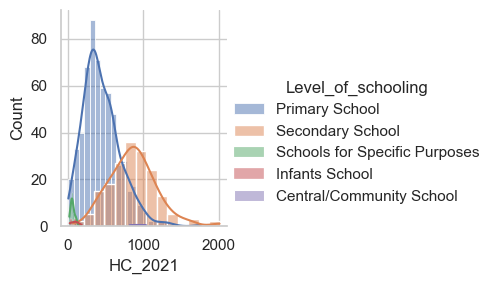

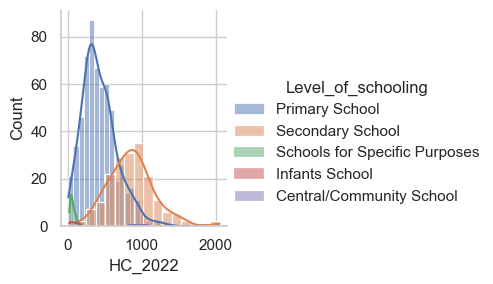

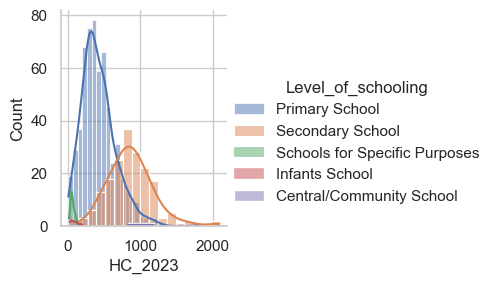

In [49]:
# Histoplot

ji=merged_data[["HC_2020", "HC_2021", "HC_2022", "HC_2023","Level_of_schooling"]]

plot = sns.FacetGrid(ji,hue="Level_of_schooling",palette="deep")
plot.map(sns.histplot, "HC_2020", kde=True).add_legend()
  
plot = sns.FacetGrid(ji, hue="Level_of_schooling")
plot.map(sns.histplot, "HC_2021", kde=True).add_legend()
  
plot = sns.FacetGrid(ji, hue="Level_of_schooling")
plot.map(sns.histplot, "HC_2022", kde=True).add_legend()

plot = sns.FacetGrid(ji, hue="Level_of_schooling")
plot.map(sns.histplot, "HC_2023", kde=True).add_legend()

plt.show()

<Axes: >

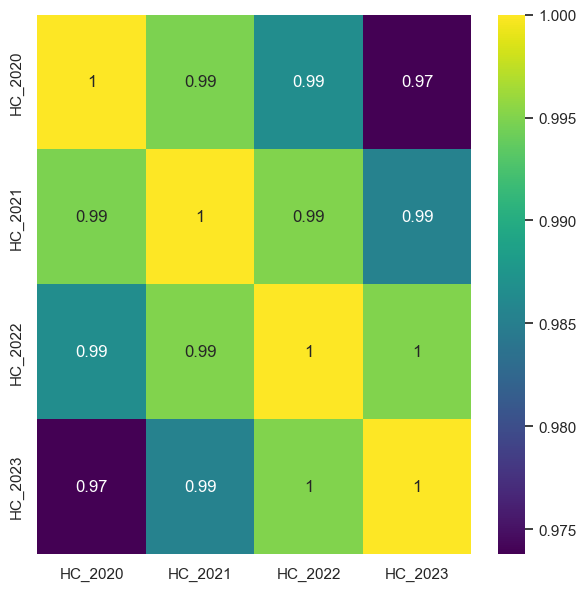

In [50]:
## Looking head conts Correlation


corre=merged_data[["HC_2020", "HC_2021", "HC_2022", "HC_2023"]]
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corre.corr(), annot=True, cmap='viridis')

# Categorzing data 

In [52]:


# Calculate quartiles
quartiles = jd['HC_2023'].quantile([0.25, 0.5, 0.75])

# Define a function to categorize based on quartile ranges
def categorize_enrolment(value):
    if value <= quartiles[0.25]:
        return 'Q1'
    elif value <= quartiles[0.5]:
        return 'Q2'
    elif value <= quartiles[0.75]:
        return 'Q3'
    else:
        return 'Q4'

# Use .loc[] to assign the new column safely
jd.loc[:, 'Quartile'] = jd.loc[:, 'HC_2023'].apply(categorize_enrolment)

# Group by Quartile and aggregate (e.g., count, mean, etc.)
grouped_data = jd.groupby('Quartile').agg({
    'HC_2023': [ 'mean', 'sum'],  # You can add more aggregations as needed
    'SA4': 'count' # Example of counting number of entries per quartile
}).reset_index()

# Display the grouped DataFrame
grouped_data

C:\Users\tanma\AppData\Local\Temp\ipykernel_9616\119625896.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jd.loc[:, 'Quartile'] = jd.loc[:, 'HC_2023'].apply(categorize_enrolment)


Quartile     HC_2023           SA4
                  mean     sum count
0       Q1  142.382775   29758   209
1       Q2  346.913876   72505   209
2       Q3  549.895238  115478   210
3       Q4  954.134615  198460   208

In [53]:
# Q1 Head count 2023 
kl=jd[["Quartile", "HC_2023","SA4","School_name","Level_of_schooling"]]
q1 = kl[kl['Quartile'] == 'Q1']

print(q1.describe())

          HC_2023
count  209.000000
mean   142.382775
std     77.318192
min      7.000000
25%     71.000000
50%    142.000000
75%    212.000000
max    263.000000


In [54]:
# all Schools sydney Head count Statitics 

test1=jd["HC_2023"]
test1.describe()



count     836.000000
mean      497.848086
std       327.503735
min         7.000000
25%       263.750000
50%       440.000000
75%       691.000000
max      2094.000000
Name: HC_2023, dtype: float64

In [55]:
nq1=q1.drop(columns="Quartile")
nq1

HC_2023                                     SA4  \
2        113                      Sydney - Blacktown   
4         71  Sydney - Baulkham Hills and Hawkesbury   
14       136           Sydney - City and Inner South   
16         9  Sydney - Baulkham Hills and Hawkesbury   
17        73                Sydney - Eastern Suburbs   
..       ...                                     ...   
819      129                     Sydney - South West   
821      254                     Sydney - Parramatta   
824      259               Sydney - Inner South West   
830      213                     Sydney - South West   
835       66  Sydney - Outer West and Blue Mountains   

                        School_name             Level_of_schooling  
2                    Halinda School  Schools for Specific Purposes  
4             Arcadia Public School                 Primary School  
14         Darlington Public School                 Primary School  
16   Macdonald Valley Public School                 Primary School  
17                    Wairoa School  Schools for Specific Purposes  
..                              ...                            ...  
819     Lansvale East Public School                 Primary School  
821  Parramatta North Public School                 Primary School  
824  Canterbury South Public School                 Primary School  
830      Warwick Farm Public School                 Primary School  
835          Wallacia Public School                 Primary School  

[209 rows x 4 columns]

In [56]:

# Define the quantiles
smallquantiles = nq1['HC_2023'].quantile([0.25, 0.5, 0.75]).values
# Function to categorize based on quantiles
def categorize(value):
    if value <= smallquantiles[0]:
        return 'Low Head Count'
    elif value <= smallquantiles[1]:
        return 'Medium Head Count'
    elif value <= smallquantiles[2]:
        return 'High Head Count'
    else:
        return 'Very High Head Count'
        

# Apply the categorization

# nq1 shows been categorized schools 
nq1['Category'] = nq1['HC_2023'].apply(categorize)
nq1_sorted=nq1.sort_values(by='HC_2023').reset_index(drop=True)
nq1_sorted

HC_2023                                     SA4  \
0          7  Sydney - Outer West and Blue Mountains   
1          9  Sydney - Baulkham Hills and Hawkesbury   
2         16                           Sydney - Ryde   
3         17                     Sydney - Sutherland   
4         25           Sydney - City and Inner South   
..       ...                                     ...   
204      259  Sydney - Outer West and Blue Mountains   
205      259               Sydney - Inner South West   
206      260               Sydney - Inner South West   
207      261                     Sydney - South West   
208      263                      Sydney - Blacktown   

                                 School_name             Level_of_schooling  \
0                     Megalong Public School                 Primary School   
1             Macdonald Valley Public School                 Primary School   
2                             Arndell School  Schools for Specific Purposes   
3                    Waterfall Public School                 Primary School   
4              Taverners Hill Infants School                 Infants School   
..                                       ...                            ...   
204                   St Marys Public School                 Primary School   
205           Canterbury South Public School                 Primary School   
206  Georges River College Hurstville Campus               Secondary School   
207                  Bonnyrigg Public School                 Primary School   
208              Eastern Creek Public School                 Primary School   

                 Category  
0          Low Head Count  
1          Low Head Count  
2          Low Head Count  
3          Low Head Count  
4          Low Head Count  
..                    ...  
204  Very High Head Count  
205  Very High Head Count  
206  Very High Head Count  
207  Very High Head Count  
208  Very High Head Count  

[209 rows x 5 columns]

In [57]:
min_max_values = nq1.groupby('Category')['HC_2023'].agg(['min', 'max']).reset_index()
min_max_values

Category  min  max
0       High Head Count  143  212
1        Low Head Count    7   71
2     Medium Head Count   72  142
3  Very High Head Count  213  263

In [58]:
nq1

HC_2023                                     SA4  \
2        113                      Sydney - Blacktown   
4         71  Sydney - Baulkham Hills and Hawkesbury   
14       136           Sydney - City and Inner South   
16         9  Sydney - Baulkham Hills and Hawkesbury   
17        73                Sydney - Eastern Suburbs   
..       ...                                     ...   
819      129                     Sydney - South West   
821      254                     Sydney - Parramatta   
824      259               Sydney - Inner South West   
830      213                     Sydney - South West   
835       66  Sydney - Outer West and Blue Mountains   

                        School_name             Level_of_schooling  \
2                    Halinda School  Schools for Specific Purposes   
4             Arcadia Public School                 Primary School   
14         Darlington Public School                 Primary School   
16   Macdonald Valley Public School                 Primary School   
17                    Wairoa School  Schools for Specific Purposes   
..                              ...                            ...   
819     Lansvale East Public School                 Primary School   
821  Parramatta North Public School                 Primary School   
824  Canterbury South Public School                 Primary School   
830      Warwick Farm Public School                 Primary School   
835          Wallacia Public School                 Primary School   

                 Category  
2       Medium Head Count  
4          Low Head Count  
14      Medium Head Count  
16         Low Head Count  
17      Medium Head Count  
..                    ...  
819     Medium Head Count  
821  Very High Head Count  
824  Very High Head Count  
830  Very High Head Count  
835        Low Head Count  

[209 rows x 5 columns]

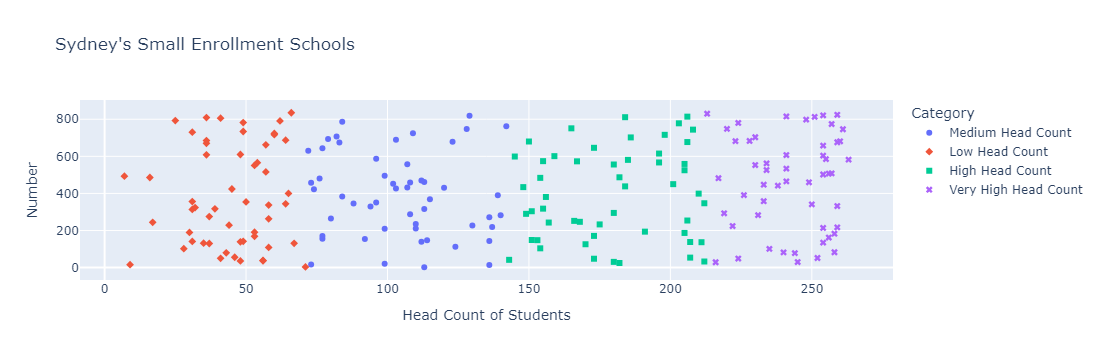

In [59]:
nq2=nq1[["HC_2023","Category"]]


# Create the scatter plot
fig = px.scatter(nq2, x='HC_2023', y=nq2.index, color='Category', symbol='Category',
                 title="Sydney's Small Enrollment Schools")

# Update layout for better visibility
fig.update_layout(
    xaxis_title='Head Count of Students',
    yaxis_title='Number',
    legend_title='Category',
    template='plotly'
)

# Show the plot
fig.show()


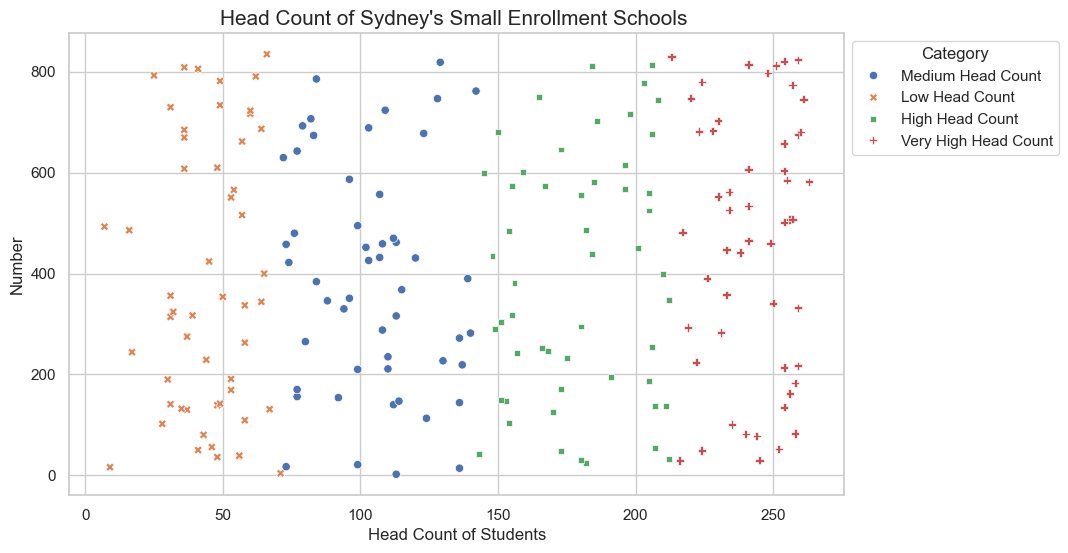

In [60]:
nq2=nq1[["HC_2023","Category"]]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=nq2, x='HC_2023', y=nq2.index, hue='Category', style='Category', palette='deep')

# Add labels and title
plt.title("Head Count of Sydney's Small Enrollment Schools ",size=15)
plt.xlabel('Head Count of Students')
plt.ylabel('Number')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plot
plt.show()


In [61]:
# Check columns in 'fd' (master dataset)
print(fd.columns)
# Save filtered datasets to new CSV files
fd.to_csv('master_dataset_filtered.csv', index=False)

# Check columns in 'fd10' (headcount dataset)
print(fd10.columns)
fd10.to_csv('headcount_filtered.csv', index=False)

Index(['School_code', 'AgeID', 'School_name', 'Street', 'Town_suburb',
       'Postcode', 'Phone', 'School_Email', 'Website', 'Fax',
       'latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct',
       'ICSEA_value', 'Level_of_schooling', 'Selective_school',
       'Opportunity_class', 'School_specialty_type', 'School_subtype',
       'Preschool_ind', 'Distance_education', 'Intensive_english_centre',
       'School_gender', 'Late_opening_school', 'Date_1st_teacher', 'LGA',
       'electorate_from_2023', 'electorate_2015_2022', 'Fed_electorate',
       'Operational_directorate', 'Principal_network',
       'Operational_directorate_office',
       'Operational_directorate_office_phone',
       'Operational_directorate_office_address', 'FACS_district',
       'Local_health_district', 'AECG_region', 'ASGS_remoteness', 'Latitude',
       'Longitude', 'Assets unit', 'SA4', 'FOEI_Value', 'Date_extracted'],
      dtype='object')
Index(['School Code', 'School Name', 'HC_2004', 'HC_2005', '

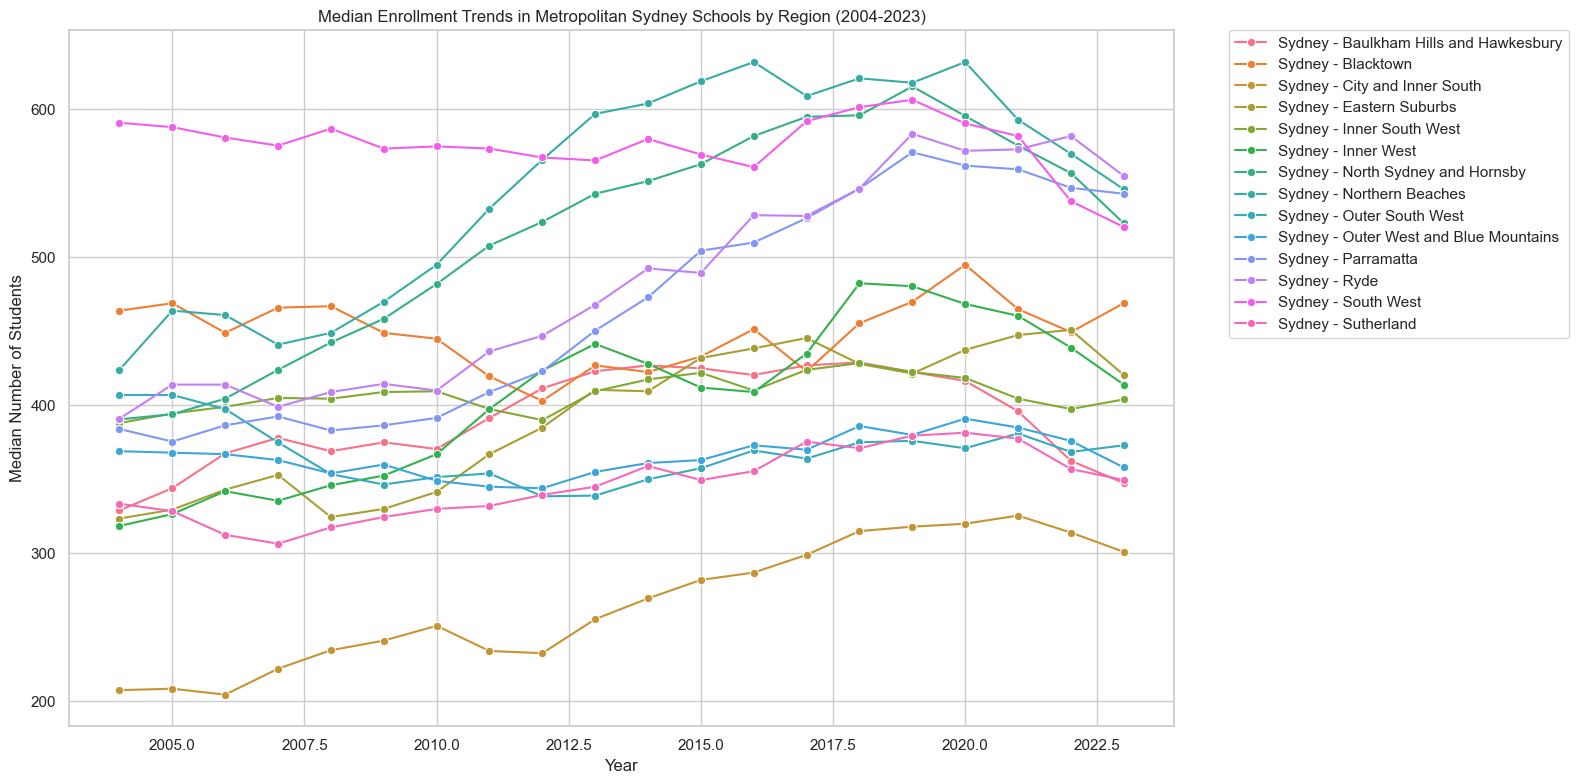

In [62]:
# List of metropolitan Sydney regions (SA4 areas)
metro_sydney_areas = [
    'Sydney - Baulkham Hills and Hawkesbury',
    'Sydney - Blacktown',
    'Sydney - City and Inner South',
    'Sydney - Eastern Suburbs',
    'Sydney - Inner South West',
    'Sydney - Inner West',
    'Sydney - North Sydney and Hornsby',
    'Sydney - Northern Beaches',
    'Sydney - Outer South West',
    'Sydney - Outer West and Blue Mountains',
    'Sydney - Parramatta',
    'Sydney - Ryde',
    'Sydney - South West',
    'Sydney - Sutherland'
]

# Merge headcount data (fd10) with the master dataset (fd) to get the SA4 region in the headcount data
merged_data = pd.merge(fd10, fd[['School_code', 'School_name', 'SA4']], 
                       left_on='School Name', right_on='School_name', how='left')

# Filter only for the metropolitan Sydney regions (SA4 regions provided)
metropolitan_schools = merged_data[merged_data['SA4'].isin(metro_sydney_areas)]

# Melt the headcount data for easier plotting (for years 2004-2023)
years = [f'HC_{year}' for year in range(2004, 2024)]
headcount_melted = pd.melt(metropolitan_schools, id_vars=["School Name", "SA4"], value_vars=years, 
                           var_name="Year", value_name="Enrollment")

# Extract year information from 'Year' column
headcount_melted['Year'] = headcount_melted['Year'].str.extract(r'(\d{4})').astype(int)

# Convert Enrollment to numeric
headcount_melted['Enrollment'] = pd.to_numeric(headcount_melted['Enrollment'], errors='coerce')

# Drop any rows with missing data
headcount_melted = headcount_melted.dropna(subset=['Year', 'Enrollment', 'SA4'])

# Calculate median enrollment per year for each SA4 region
median_enrollment = headcount_melted.groupby(['Year', 'SA4'])['Enrollment'].median().reset_index()

# Now plot the median enrollment trends by SA4 region
plt.figure(figsize=(12, 8))
sns.lineplot(data=median_enrollment, x='Year', y='Enrollment', hue='SA4', marker='o')

plt.title('Median Enrollment Trends in Metropolitan Sydney Schools by Region (2004-2023)')
plt.ylabel('Median Number of Students')
plt.xlabel('Year')
plt.tight_layout()

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Save the plot as a high-resolution image (300 DPI)
plt.savefig('C:/Users/tanma/Downloads/enrollment_trends_metropolitan_sydney_high_res.png', dpi=300)

# Show the plot
plt.show()

In [63]:
print(headcount_melted.columns)
print(fd.columns)

Index(['School Name', 'SA4', 'Year', 'Enrollment'], dtype='object')
Index(['School_code', 'AgeID', 'School_name', 'Street', 'Town_suburb',
       'Postcode', 'Phone', 'School_Email', 'Website', 'Fax',
       'latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct',
       'ICSEA_value', 'Level_of_schooling', 'Selective_school',
       'Opportunity_class', 'School_specialty_type', 'School_subtype',
       'Preschool_ind', 'Distance_education', 'Intensive_english_centre',
       'School_gender', 'Late_opening_school', 'Date_1st_teacher', 'LGA',
       'electorate_from_2023', 'electorate_2015_2022', 'Fed_electorate',
       'Operational_directorate', 'Principal_network',
       'Operational_directorate_office',
       'Operational_directorate_office_phone',
       'Operational_directorate_office_address', 'FACS_district',
       'Local_health_district', 'AECG_region', 'ASGS_remoteness', 'Latitude',
       'Longitude', 'Assets unit', 'SA4', 'FOEI_Value', 'Date_extracted'],
      dtype='o

Adjusted Columns in headcount_melted: Index(['School_name', 'SA4', 'Year', 'Enrollment'], dtype='object')
Columns in fd: Index(['School_code', 'AgeID', 'School_name', 'Street', 'Town_suburb',
       'Postcode', 'Phone', 'School_Email', 'Website', 'Fax',
       'latest_year_enrolment_FTE', 'Indigenous_pct', 'LBOTE_pct',
       'ICSEA_value', 'Level_of_schooling', 'Selective_school',
       'Opportunity_class', 'School_specialty_type', 'School_subtype',
       'Preschool_ind', 'Distance_education', 'Intensive_english_centre',
       'School_gender', 'Late_opening_school', 'Date_1st_teacher', 'LGA',
       'electorate_from_2023', 'electorate_2015_2022', 'Fed_electorate',
       'Operational_directorate', 'Principal_network',
       'Operational_directorate_office',
       'Operational_directorate_office_phone',
       'Operational_directorate_office_address', 'FACS_district',
       'Local_health_district', 'AECG_region', 'ASGS_remoteness', 'Latitude',
       'Longitude', 'Assets unit', '

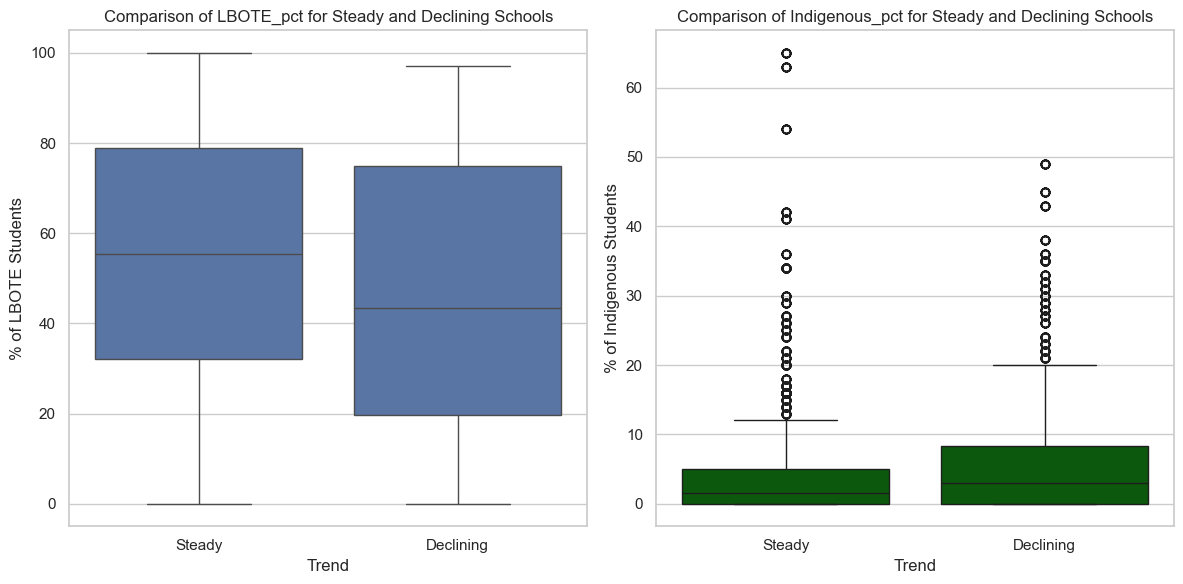

<Figure size 640x480 with 0 Axes>

In [64]:
# Ensure 'School_name' column exists; if not, adjust to match existing column name
if 'School_name' not in headcount_melted.columns:
    # Assuming the column might be named 'School Name' or similar
    headcount_melted.rename(columns={'School Name': 'School_name'}, inplace=True)

# Verify columns again after renaming
print("Adjusted Columns in headcount_melted:", headcount_melted.columns)

# Categorize schools based on enrollment trends (steady or declining)
school_growth = headcount_melted.groupby('School_name')['Enrollment'].agg(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()

# Classify schools as "Declining" or "Steady"
school_growth['Trend'] = ['Declining' if x < 0 else 'Steady' for x in school_growth['Enrollment']]

# Merge the trend classification back into the main data
headcount_melted = pd.merge(
    headcount_melted, 
    school_growth[['School_name', 'Trend']], 
    on='School_name', 
    suffixes=('', '_y')
)

# Drop the duplicate "Trend_y" column if it exists
if 'Trend_y' in headcount_melted.columns:
    headcount_melted.drop(columns=['Trend_y'], inplace=True)

# Filter for steady and declining schools
steady_declining_data = headcount_melted[headcount_melted['Trend'].isin(['Steady', 'Declining'])]

# Check column names in 'fd' to confirm the exact name of the school name column and adjust as needed
print("Columns in fd:", fd.columns)

# Merge the LBOTE_pct and Indigenous_pct data from 'fd' into the filtered data
if 'School Name' in fd.columns:
    steady_declining_data = pd.merge(
        steady_declining_data, 
        fd[['School Name', 'LBOTE_pct', 'Indigenous_pct']].rename(columns={'School Name': 'School_name'}), 
        on='School_name'
    )
else:
    steady_declining_data = pd.merge(
        steady_declining_data, 
        fd[['School_name', 'LBOTE_pct', 'Indigenous_pct']], 
        on='School_name'
    )

# Convert LBOTE_pct and Indigenous_pct to numeric values, handling non-numeric entries
steady_declining_data['LBOTE_pct'] = pd.to_numeric(steady_declining_data['LBOTE_pct'], errors='coerce')
steady_declining_data['Indigenous_pct'] = pd.to_numeric(steady_declining_data['Indigenous_pct'], errors='coerce')

# Create box plots comparing LBOTE_pct and Indigenous_pct for steady and declining schools
plt.figure(figsize=(12, 6))

# Boxplot for LBOTE_pct
plt.subplot(1, 2, 1)
sns.boxplot(x='Trend', y='LBOTE_pct', data=steady_declining_data)
plt.title('Comparison of LBOTE_pct for Steady and Declining Schools')
plt.ylabel('% of LBOTE Students')
plt.xlabel('Trend')

# Boxplot for Indigenous_pct with custom color (dark green)
plt.subplot(1, 2, 2)
sns.boxplot(x='Trend', y='Indigenous_pct', data=steady_declining_data, color='darkgreen')
plt.title('Comparison of Indigenous_pct for Steady and Declining Schools')
plt.ylabel('% of Indigenous Students')
plt.xlabel('Trend')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Define color map based on level of schooling
color_map = {
    'Primary School': 'blue',
    'Secondary School': 'green',
    'Infants School': 'purple',
    'Other School': 'orange',
    'Schools For Specific Purposes': 'red',
    'Environmental Education Centre': 'yellow',
    'Central/Community School': 'pink',
}

plt.savefig('C:/Users/tanma/Downloads/box_plot_metropolitan_sydney_high_res.png', dpi=300)


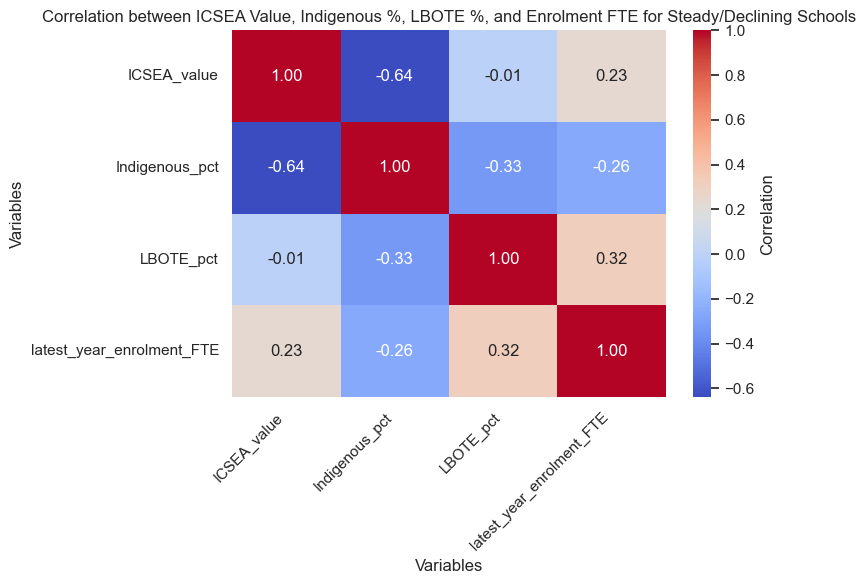

In [72]:
# Define Sydney metropolitan regions (SA4 areas)
sydney_regions = [
    "Sydney - Baulkham Hills and Hawkesbury", "Sydney - Blacktown",
    "Sydney - City and Inner South", "Sydney - Eastern Suburbs",
    "Sydney - Inner South West", "Sydney - Inner West",
    "Sydney - North Sydney and Hornsby", "Sydney - Northern Beaches",
    "Sydney - Outer South West", "Sydney - Outer West and Blue Mountains",
    "Sydney - Parramatta", "Sydney - Ryde", "Sydney - South West",
    "Sydney - Sutherland"]

# Filter dataset to include only the specified Sydney metropolitan regions
filtered_data = fd.loc[fd['SA4'].isin(sydney_regions)].copy()

# Ensure 'latest_year_enrolment_FTE' is numeric to avoid errors
filtered_data.loc[:, 'latest_year_enrolment_FTE'] = pd.to_numeric(filtered_data['latest_year_enrolment_FTE'], errors='coerce')

# Categorize schools based on enrollment trends (steady or declining)
school_growth = filtered_data.groupby('School_name')['latest_year_enrolment_FTE'].agg(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()

# Classify schools as "Declining" or "Steady"
school_growth['Trend'] = ['Declining' if x < 0 else 'Steady' for x in school_growth['latest_year_enrolment_FTE']]

# Merge the trend classification back into the main data
filtered_data = pd.merge(
    filtered_data,
    school_growth[['School_name', 'Trend']],
    on='School_name',
    suffixes=('', '_y')
)

# Filter for schools with steady or declining trends
steady_declining_data = filtered_data[filtered_data['Trend'].isin(['Steady', 'Declining'])]

# Convert relevant columns to numeric, handling non-numeric values
steady_declining_data['ICSEA_value'] = pd.to_numeric(steady_declining_data['ICSEA_value'], errors='coerce')
steady_declining_data['Indigenous_pct'] = pd.to_numeric(steady_declining_data['Indigenous_pct'], errors='coerce')
steady_declining_data['LBOTE_pct'] = pd.to_numeric(steady_declining_data['LBOTE_pct'], errors='coerce')
steady_declining_data['latest_year_enrolment_FTE'] = pd.to_numeric(steady_declining_data['latest_year_enrolment_FTE'], errors='coerce')

# Select the columns we want to analyze for correlation
correlation_data = steady_declining_data[['ICSEA_value', 'Indigenous_pct', 'LBOTE_pct', 'latest_year_enrolment_FTE']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title("Correlation between ICSEA Value, Indigenous %, LBOTE %, and Enrolment FTE for Steady/Declining Schools")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig('C:/Users/tanma/Downloads/box_plot_metropolitan_sydney_high_res.png', dpi=300)
plt.show()


In [68]:
import pandas as pd
import numpy as np

# Assuming 'merged_data' is your DataFrame and 'years' is a list of column names representing the years
years = [col for col in merged_data.columns if col.startswith('HC_')]  # Example to extract year columns

# Convert enrollment columns to numeric
for year in years:
    merged_data[year] = pd.to_numeric(merged_data[year], errors='coerce')

# Calculate percentage change in enrollment for each school from year to year
enrollment_change = merged_data.set_index('School_name')[years].pct_change(axis=1).fillna(0)

# Get schools with steady or declining enrollment trend (non-positive change across all years)
steady_declining_schools = enrollment_change.apply(lambda x: (x <= 0).all(), axis=1)

# Filter the dataset to include only schools with steady or declining enrollment trends
filtered_schools = merged_data[merged_data['School_name'].isin(steady_declining_schools[steady_declining_schools].index)]

# Get the latest year's data for enrollments
filtered_schools['Latest_Enrollment'] = filtered_schools[years[-1]]

# Drop rows with missing values in the key columns
filtered_schools = filtered_schools.dropna(subset=['Latest_Enrollment', 'Indigenous_pct', 'LBOTE_pct', 'ICSEA_value'])

# Now we can create the scatter plots

C:\Users\tanma\AppData\Local\Temp\ipykernel_9616\2873288866.py:12: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

C:\Users\tanma\AppData\Local\Temp\ipykernel_9616\2873288866.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



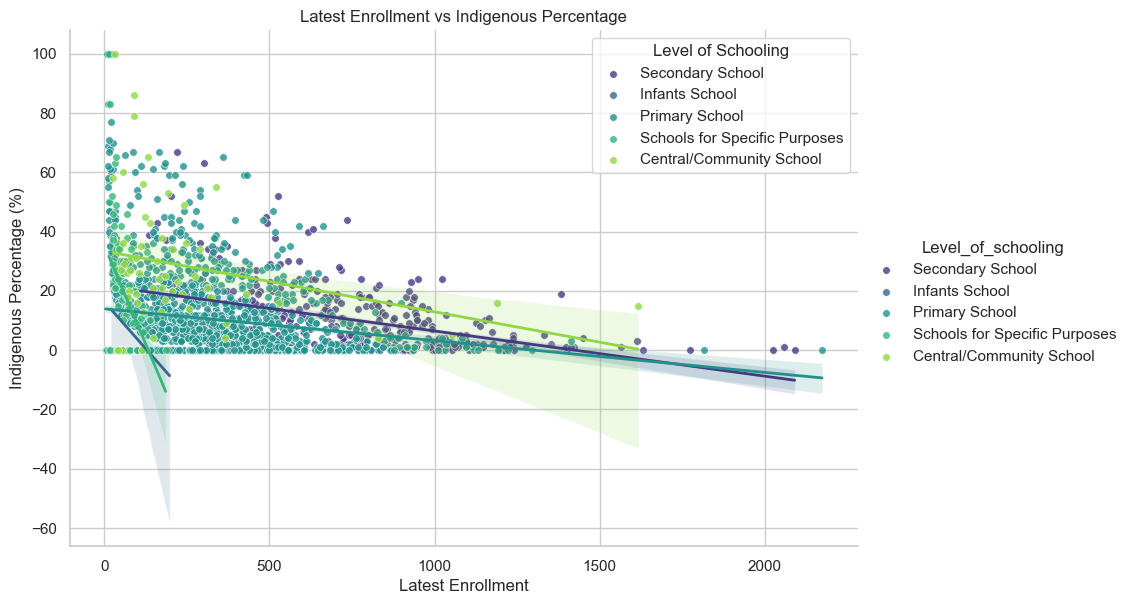

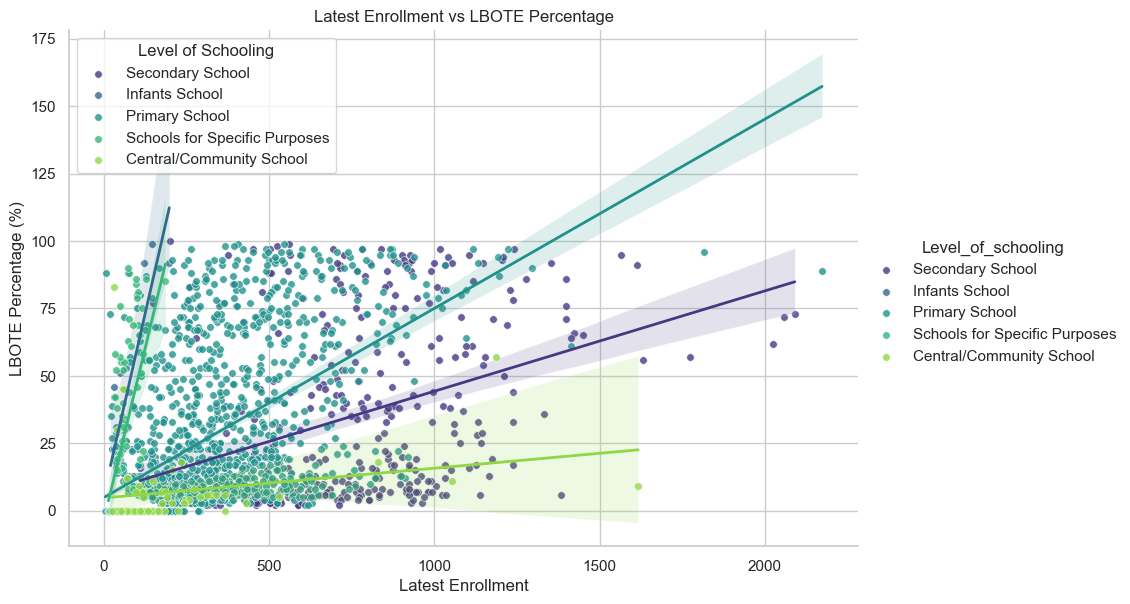

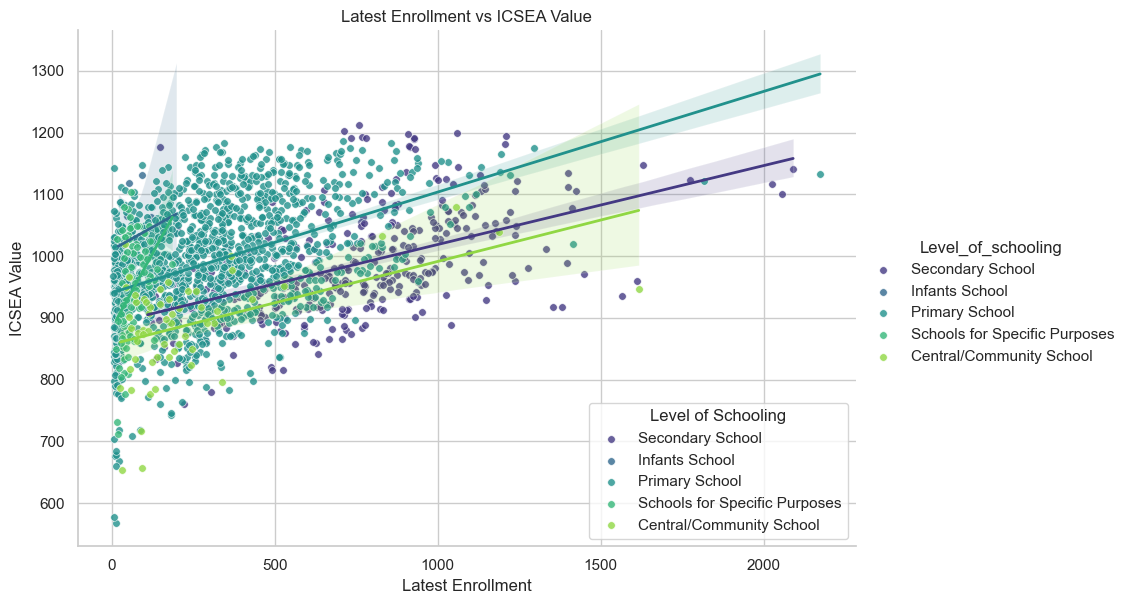

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure relevant columns are numeric
fd['latest_year_enrolment_FTE'] = pd.to_numeric(fd['latest_year_enrolment_FTE'], errors='coerce')
fd['Indigenous_pct'] = pd.to_numeric(fd['Indigenous_pct'], errors='coerce')
fd['LBOTE_pct'] = pd.to_numeric(fd['LBOTE_pct'], errors='coerce')
fd['ICSEA_value'] = pd.to_numeric(fd['ICSEA_value'], errors='coerce')

# Filter dataset to include only steady or declining schools based on enrollment trend (if applicable)
steady_declining_schools = fd[fd['latest_year_enrolment_FTE'] > 0]  # Adjust based on trend condition if needed

# Scatter plot 1: Latest Enrollment vs Indigenous Percentage with trendline
sns.lmplot(
    data=steady_declining_schools,
    x='latest_year_enrolment_FTE',
    y='Indigenous_pct',
    hue='Level_of_schooling',
    palette="viridis",
    height=6,
    aspect=1.5,
    scatter_kws={'s': 30, 'edgecolor': 'white', 'linewidths': 0.5},  # Adjusted circle size and added white border
    line_kws={'linewidth': 2}
)
plt.title('Latest Enrollment vs Indigenous Percentage')
plt.xlabel('Latest Enrollment')
plt.ylabel('Indigenous Percentage (%)')
plt.legend(title='Level of Schooling')
plt.show()

# Scatter plot 2: Latest Enrollment vs LBOTE Percentage with trendline
sns.lmplot(
    data=steady_declining_schools,
    x='latest_year_enrolment_FTE',
    y='LBOTE_pct',
    hue='Level_of_schooling',
    palette="viridis",
    height=6,
    aspect=1.5,
    scatter_kws={'s': 30, 'edgecolor': 'white', 'linewidths': 0.5},  # Adjusted circle size and added white border
    line_kws={'linewidth': 2}
)
plt.title('Latest Enrollment vs LBOTE Percentage')
plt.xlabel('Latest Enrollment')
plt.ylabel('LBOTE Percentage (%)')
plt.legend(title='Level of Schooling')
plt.show()

# Scatter plot 3: Latest Enrollment vs ICSEA Value with trendline
sns.lmplot(
    data=steady_declining_schools,
    x='latest_year_enrolment_FTE',
    y='ICSEA_value',
    hue='Level_of_schooling',
    palette="viridis",
    height=6,
    aspect=1.5,
    scatter_kws={'s': 30, 'edgecolor': 'white', 'linewidths': 0.5},  # Adjusted circle size and added white border
    line_kws={'linewidth': 2}
)
plt.title('Latest Enrollment vs ICSEA Value')
plt.xlabel('Latest Enrollment')
plt.ylabel('ICSEA Value')
plt.legend(title='Level of Schooling')
plt.show()


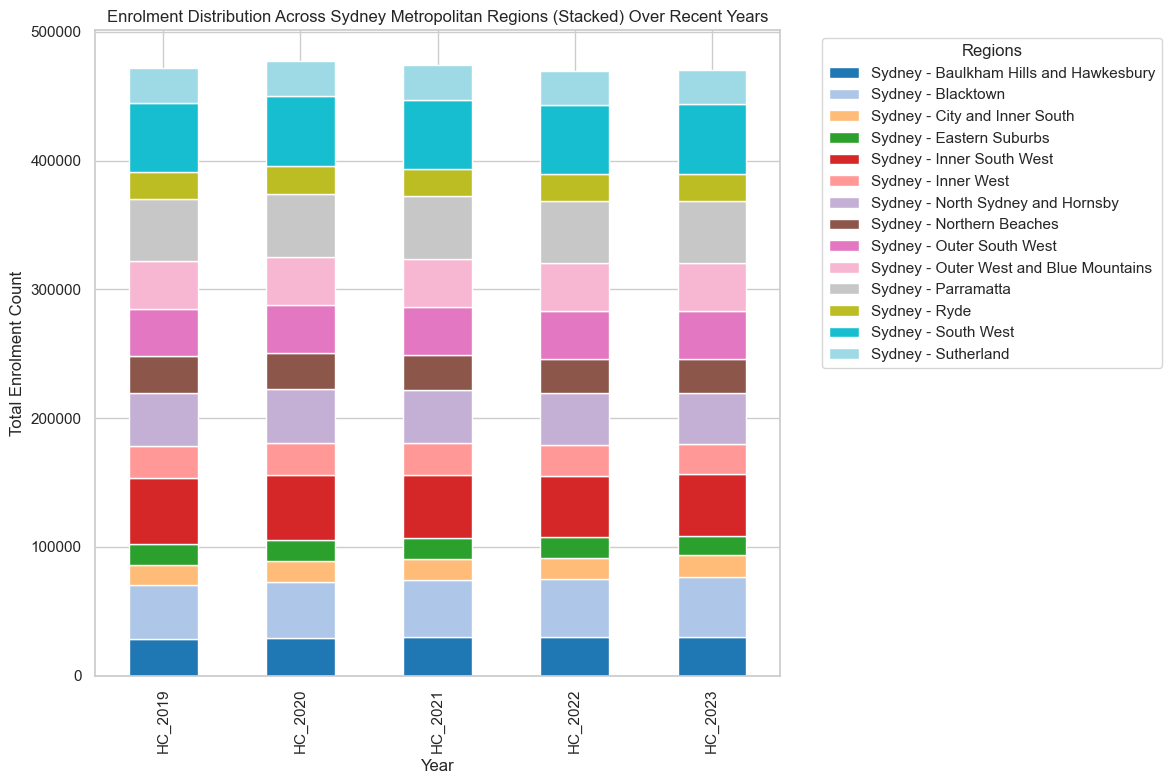

C:\Users\tanma\AppData\Local\Temp\ipykernel_9616\467998469.py:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




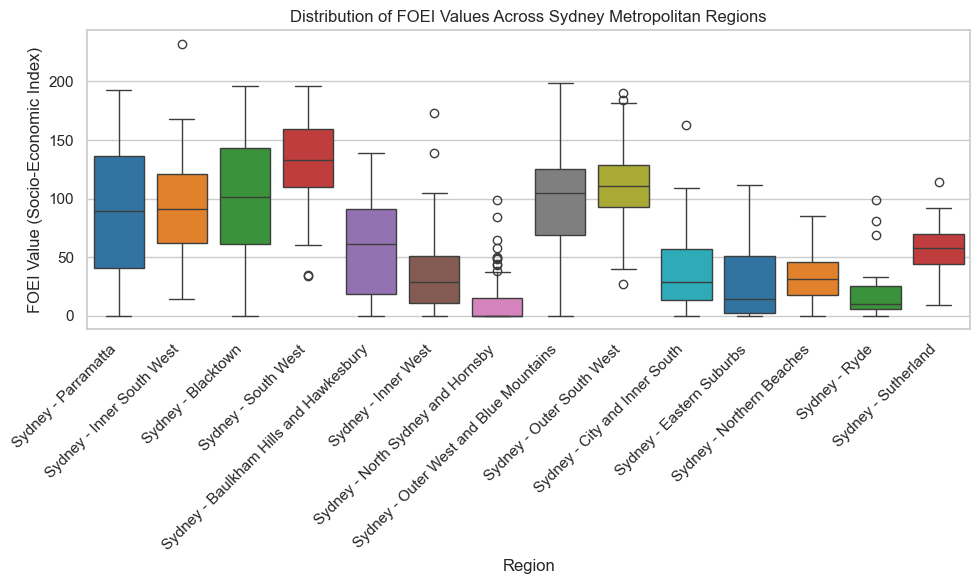

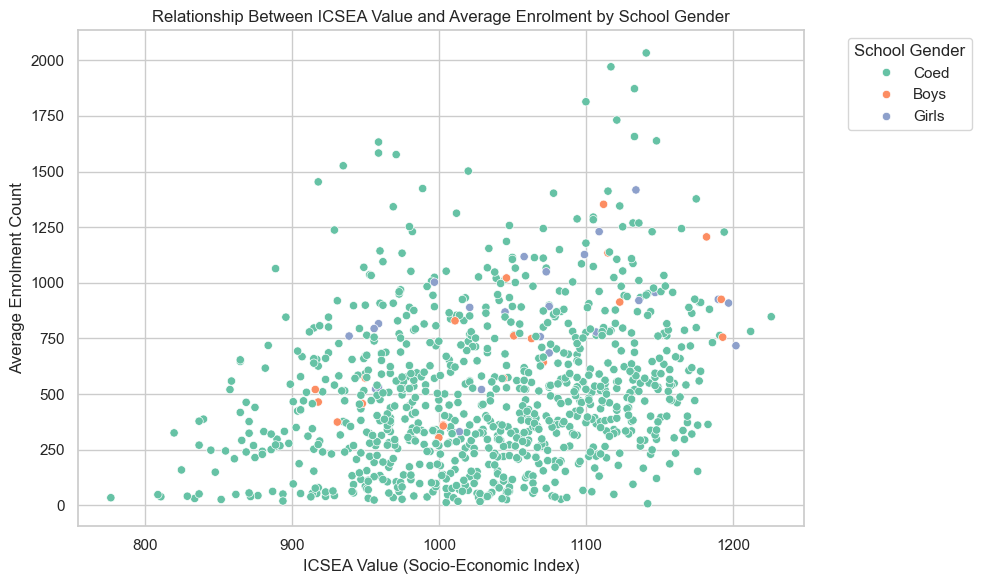

In [86]:
# Load datasets
headcount_df = pd.read_csv('headcount.csv')  # Update with correct path
master_dataset_df = pd.read_csv('master_dataset1.csv')  # Update with correct path

# Define Sydney metropolitan regions of interest
sydney_metropolitan_regions = [
    "Sydney - Baulkham Hills and Hawkesbury", "Sydney - Blacktown",
    "Sydney - City and Inner South", "Sydney - Eastern Suburbs",
    "Sydney - Inner South West", "Sydney - Inner West",
    "Sydney - North Sydney and Hornsby", "Sydney - Northern Beaches",
    "Sydney - Outer South West", "Sydney - Outer West and Blue Mountains",
    "Sydney - Parramatta", "Sydney - Ryde", "Sydney - South West",
    "Sydney - Sutherland"
]

# Prepare master dataset (cleaned_df)
master_dataset_df = master_dataset_df.drop_duplicates().dropna(subset=['School_code', 'FOEI_Value', 'School_gender'])
cleaned_df = master_dataset_df[master_dataset_df['SA4'].isin(sydney_metropolitan_regions)]

# Merge data to include enrolment, FOEI, SA4, and school gender
sydney_enrolment_data = pd.merge(
    headcount_df,
    cleaned_df[['School_code', 'SA4', 'ICSEA_value','FOEI_Value', 'School_gender']],
    left_on='School Code',
    right_on='School_code',
    how='inner'
)

# Filter only Sydney metropolitan regions in the merged data
sydney_enrolment_data = sydney_enrolment_data[sydney_enrolment_data['SA4'].isin(sydney_metropolitan_regions)]

# Define recent years and convert headcount columns to numeric (handling non-numeric values as NaN)
recent_years = ["HC_2019", "HC_2020", "HC_2021", "HC_2022", "HC_2023"]
sydney_enrolment_data[recent_years] = sydney_enrolment_data[recent_years].apply(pd.to_numeric, errors='coerce')

# Calculate the average enrolment for recent years
sydney_enrolment_data['Average_Enrolment'] = sydney_enrolment_data[recent_years].mean(axis=1)

# Visualization 1: Stacked Column Chart for Enrolment Distribution Across Regions
enrolment_by_region_year = sydney_enrolment_data.groupby('SA4')[recent_years].sum().T  # Transpose to have years on x-axis
plt.figure(figsize=(12, 8))
enrolment_by_region_year.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title("Enrolment Distribution Across Sydney Metropolitan Regions (Stacked) Over Recent Years")
plt.xlabel("Year")
plt.ylabel("Total Enrolment Count")
plt.legend(title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('C:/Users/tanma/Downloads/Bar_chart_metropolitan_sydney_high_res.png', dpi=300)
plt.show()

# Visualization 2: Box Plot for FOEI Values across Regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=sydney_enrolment_data, x='SA4', y='FOEI_Value', palette='tab10')
plt.title("Distribution of FOEI Values Across Sydney Metropolitan Regions")
plt.xlabel("Region")
plt.ylabel("FOEI Value (Socio-Economic Index)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('C:/Users/tanma/Downloads/box_plot5_metropolitan_sydney_high_res.png', dpi=300)
plt.show()

# Visualization 3: Scatter Plot for Relationship between FOEI Value and Average Enrolment by School Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sydney_enrolment_data, x='ICSEA_value', y='Average_Enrolment', hue='School_gender', palette='Set2')
plt.title("Relationship Between ICSEA Value and Average Enrolment by School Gender")
plt.xlabel("ICSEA Value (Socio-Economic Index)")
plt.ylabel("Average Enrolment Count")
plt.legend(title="School Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('C:/Users/tanma/Downloads/Scatter_plot_metropolitan_sydney_high_res.png', dpi=300)
plt.show()

In [113]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load datasets (replace paths with the actual paths to your CSV files)
master_data = pd.read_csv('master_dataset1.csv')
headcount_data = pd.read_csv('headcount.csv')

# Define the list of SA4 regions in the metropolitan area of Sydney
sydney_metropolitan_sa4 = [
    'Sydney - City and Inner South', 'Sydney - Blacktown', 'Sydney - Outer West and Blue Mountains',
    'Sydney - Inner West', 'Sydney - Northern Beaches', 'Sydney - Parramatta', 'Sydney - Inner South West',
    'Sydney - Ryde', 'Sydney - North Sydney and Hornsby', 'Sydney - Outer South West',
    'Sydney - Eastern Suburbs', 'Sydney - Sutherland', 'Sydney - Baulkham Hills and Hawkesbury',
    'Sydney - South West'
]

# Filter master data for Sydney metropolitan SA4 regions
sydney_data = master_data[master_data['SA4'].isin(sydney_metropolitan_sa4)].copy()

# Merge with headcount data based on school code
sydney_data = sydney_data.merge(headcount_data, left_on='School_code', right_on='School Code', how='left')

# Convert enrollment years to numeric for analysis
enrollment_columns = [col for col in sydney_data.columns if col.startswith('HC_')]
sydney_data[enrollment_columns] = sydney_data[enrollment_columns].apply(pd.to_numeric, errors='coerce')

# Define the threshold for small enrollments and calculate 'is_small' and 'is_declining' flags
small_threshold = 200
sydney_data['is_small'] = sydney_data[enrollment_columns].apply(lambda x: x < small_threshold, axis=1).any(axis=1)
sydney_data['is_declining'] = sydney_data.apply(
    lambda row: row[enrollment_columns[-5:]].is_monotonic_decreasing if not row[enrollment_columns].isnull().all() else False,
    axis=1
)

# Mark schools as 'at risk' if they are small or have declining enrollments
sydney_data['at_risk'] = sydney_data['is_small'] | sydney_data['is_declining']
at_risk_schools = sydney_data[sydney_data['at_risk']]

# Create the map
sydney_center = [-33.8688, 151.2093]
sydney_map = folium.Map(location=sydney_center, zoom_start=10)
marker_cluster = MarkerCluster().add_to(sydney_map)

# Add markers for each at-risk school
for _, row in at_risk_schools.iterrows():
    school_name = row['School_name']
    sa4_region = row['SA4']
    enrollment = row[enrollment_columns[-1]] if pd.notnull(row[enrollment_columns[-1]]) else 'Unknown'
    popup_info = f"School: {school_name}<br>SA4 Region: {sa4_region}<br>Enrollment: {enrollment}"
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_info,
        icon=folium.Icon(color='red', icon='exclamation-triangle')
    ).add_to(marker_cluster)

# Save map to an HTML file
sydney_map.save("sydney_at_risk_schools_map.html")
webbrowser.open('sydney_at_risk_schools_map.html')

True

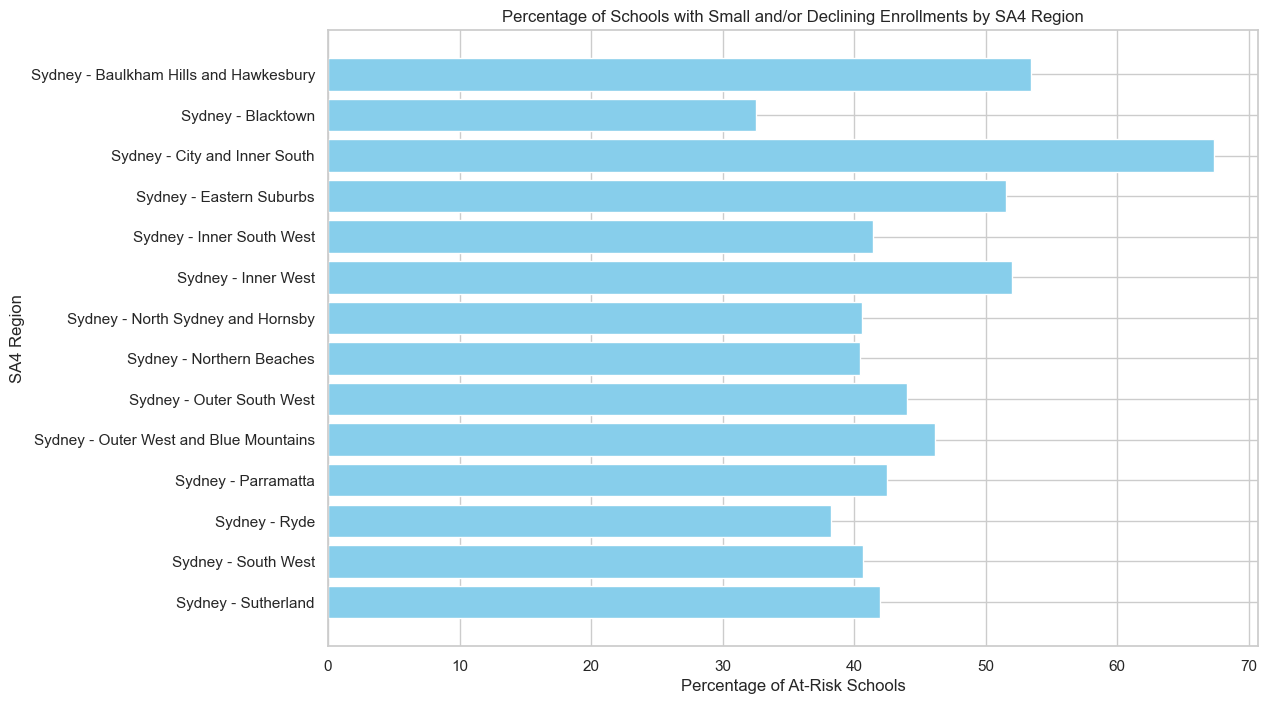

<Figure size 640x480 with 0 Axes>

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets (replace with actual paths as required)
master_data = pd.read_csv('master_dataset1.csv')
headcount_data = pd.read_csv('headcount.csv')

# Define Sydney's metropolitan SA4 regions
sydney_metropolitan_sa4 = [
    'Sydney - City and Inner South', 'Sydney - Blacktown', 'Sydney - Outer West and Blue Mountains',
    'Sydney - Inner West', 'Sydney - Northern Beaches', 'Sydney - Parramatta', 'Sydney - Inner South West',
    'Sydney - Ryde', 'Sydney - North Sydney and Hornsby', 'Sydney - Outer South West',
    'Sydney - Eastern Suburbs', 'Sydney - Sutherland', 'Sydney - Baulkham Hills and Hawkesbury',
    'Sydney - South West'
]

# Filter master data for Sydney metropolitan SA4 regions
sydney_data = master_data[master_data['SA4'].isin(sydney_metropolitan_sa4)].copy()

# Merge with headcount data based on school code
sydney_data = sydney_data.merge(headcount_data, left_on='School_code', right_on='School Code', how='left')

# Convert enrollment columns to numeric for analysis
enrollment_columns = [col for col in sydney_data.columns if col.startswith('HC_')]
sydney_data[enrollment_columns] = sydney_data[enrollment_columns].apply(pd.to_numeric, errors='coerce')

# Define threshold for "small" school and identify declining trend
small_threshold = 200
sydney_data['is_small'] = sydney_data[enrollment_columns].apply(lambda x: x < small_threshold, axis=1).any(axis=1)

# Check for declining enrollment over the last 5 years
sydney_data['is_declining'] = sydney_data.apply(
    lambda row: row[enrollment_columns[-5:]].is_monotonic_decreasing if not row[enrollment_columns].isnull().all() else False,
    axis=1
)

# Mark schools that are either small or declining
sydney_data['at_risk'] = sydney_data['is_small'] | sydney_data['is_declining']

# Calculate percentage of at-risk schools by SA4 region
sa4_risk_summary = sydney_data.groupby('SA4')['at_risk'].mean() * 100
sa4_risk_summary = sa4_risk_summary.reset_index()
sa4_risk_summary.columns = ['SA4 Region', 'Percent At-Risk Schools']

# Plotting the percentage of at-risk schools by SA4 region
plt.figure(figsize=(12, 8))
plt.barh(sa4_risk_summary['SA4 Region'], sa4_risk_summary['Percent At-Risk Schools'], color='skyblue')
plt.xlabel('Percentage of At-Risk Schools')
plt.ylabel('SA4 Region')
plt.title('Percentage of Schools with Small and/or Declining Enrollments by SA4 Region')
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Display the plot
plt.show()

plt.savefig('C:/Users/tanma/Downloads/Horizontal_bar_metropolitan_sydney_high_res.png', dpi=300)